In [25]:
#Project 1 
#(1)Dataset Selection
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset using a different encoding
df = pd.read_csv("Global_Superstore2.csv", encoding='ISO-8859-1')

# Show the first few rows to confirm it's loaded
print(df.head())


   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [27]:
#(2)Tasks to Perfrom
#Clean Data
#Handle Missing Values
# Check how many missing values are there
print(df.isnull().sum())

# Fill empty number columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill empty text columns with "Unknown"
df.fillna("Unknown", inplace=True)


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [29]:
#Remove Duplicates
# Count and remove duplicates
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicates: 0


In [36]:
#Remove Outliers
# Use IQR to remove outliers in number columns
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


In [39]:
#Final Check
print("Cleaned shape:", df.shape)
print("Missing values left?", df.isnull().sum().sum())


Cleaned shape: (12695, 24)
Missing values left? 0


In [41]:
#Statistical Analysis
#Mean Mode Median
# Select only numeric columns
num_data = df.select_dtypes(include='number')

# Mean
print("Mean:\n", num_data.mean())

# Median
print("\nMedian:\n", num_data.median())

# Standard Deviation
print("\nStandard Deviation:\n", num_data.std())

# Variance
print("\nVariance:\n", num_data.var())


Mean:
 Row ID           24897.603545
Postal Code      56430.500000
Sales               47.986275
Quantity             2.384640
Discount             0.000000
Profit              10.692322
Shipping Cost        4.413497
dtype: float64

Median:
 Row ID           20110.00
Postal Code      56430.50
Sales               40.38
Quantity             2.00
Discount             0.00
Profit               8.10
Shipping Cost        3.53
dtype: float64

Standard Deviation:
 Row ID           17148.921261
Postal Code          0.000000
Sales               33.054833
Quantity             1.365491
Discount             0.000000
Profit               9.061502
Shipping Cost        3.299211
dtype: float64

Variance:
 Row ID           2.940855e+08
Postal Code      0.000000e+00
Sales            1.092622e+03
Quantity         1.864566e+00
Discount         0.000000e+00
Profit           8.211081e+01
Shipping Cost    1.088479e+01
dtype: float64


In [43]:
#Correlation
# Correlation matrix
correlation = num_data.corr()

# Display correlation
print("\nCorrelation Matrix:\n", correlation)



Correlation Matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000          NaN -0.057129 -0.382480       NaN -0.068286   
Postal Code         NaN          NaN       NaN       NaN       NaN       NaN   
Sales         -0.057129          NaN  1.000000  0.323309       NaN  0.566072   
Quantity      -0.382480          NaN  0.323309  1.000000       NaN  0.247822   
Discount            NaN          NaN       NaN       NaN       NaN       NaN   
Profit        -0.068286          NaN  0.566072  0.247822       NaN  1.000000   
Shipping Cost -0.044929          NaN  0.670985  0.246383       NaN  0.408238   

               Shipping Cost  
Row ID             -0.044929  
Postal Code              NaN  
Sales               0.670985  
Quantity            0.246383  
Discount                 NaN  
Profit              0.408238  
Shipping Cost       1.000000  


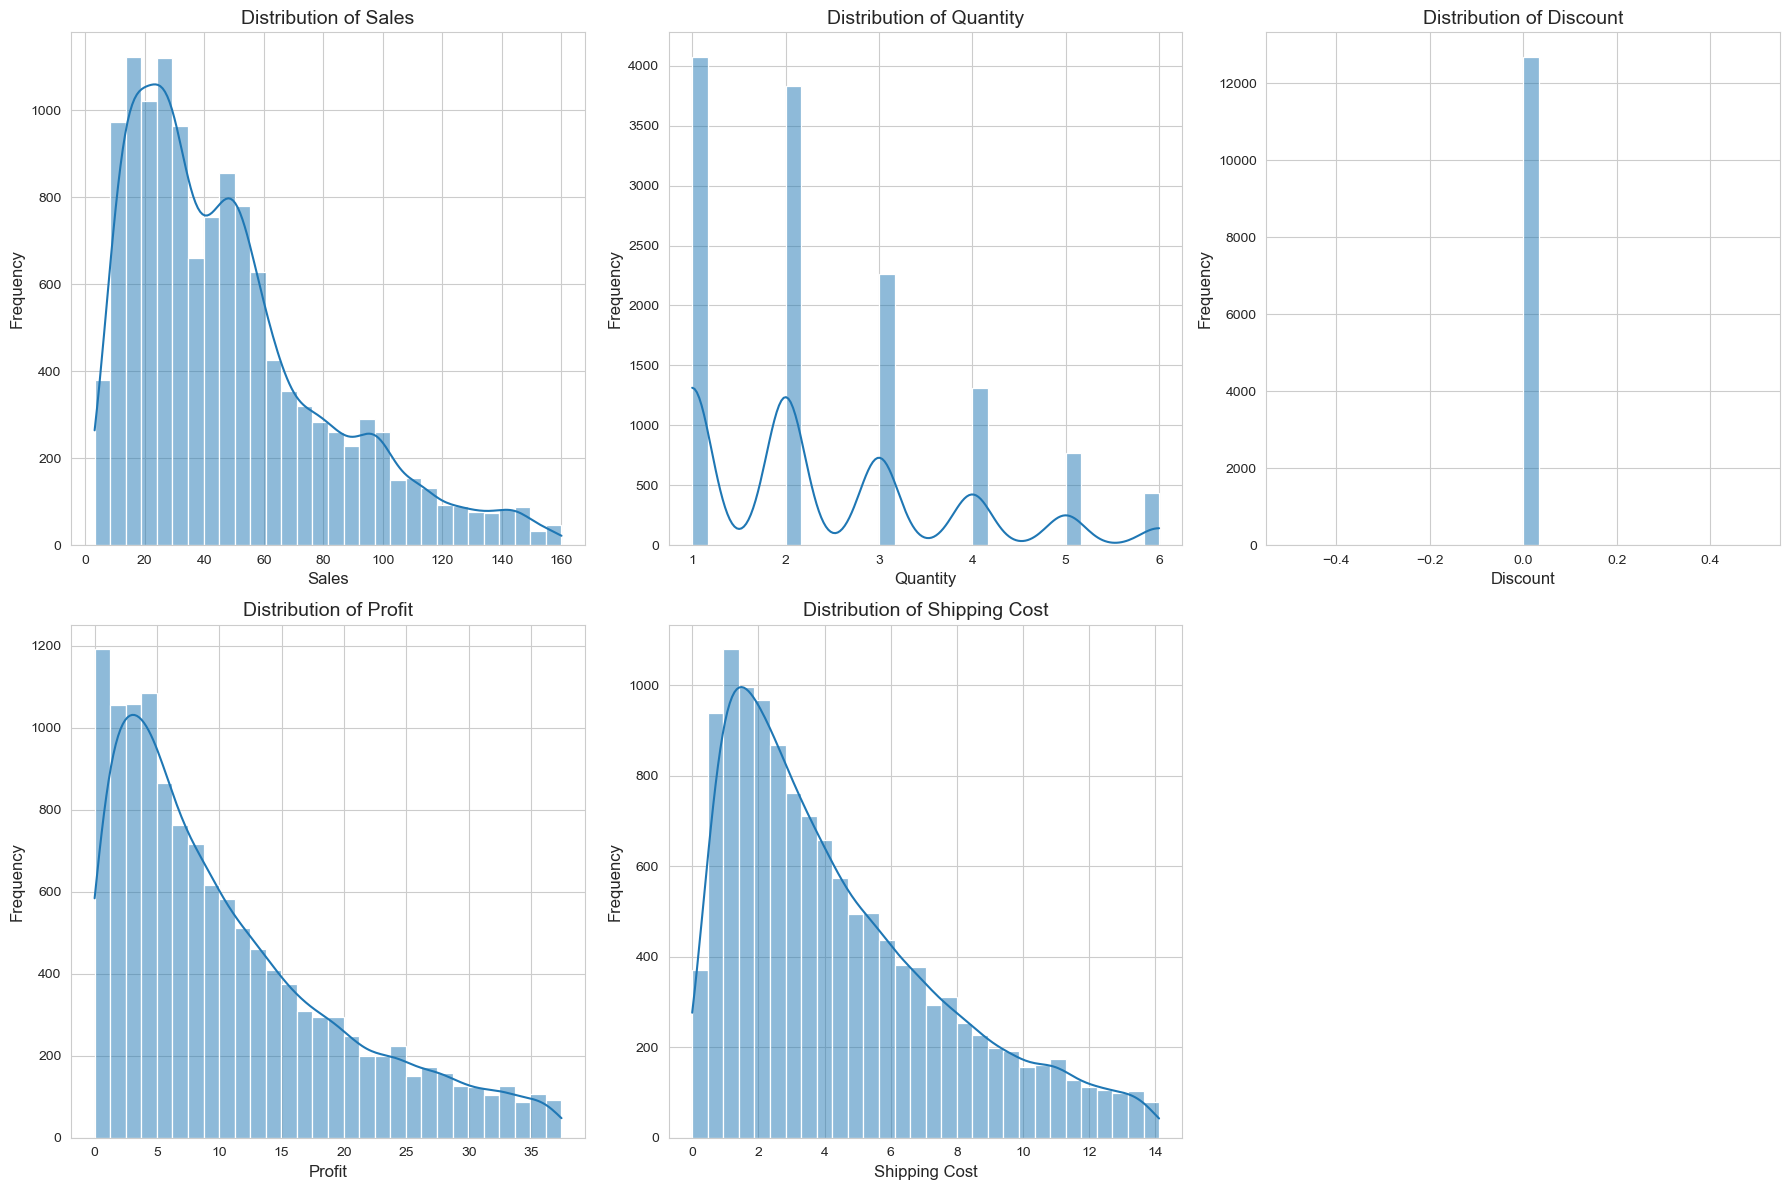

In [47]:
#Data Visualization
#Histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten() # Flatten the 2x3 array of axes to easily iterate

# List of numerical columns for which histograms are to be generated
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Generate histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Remove any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

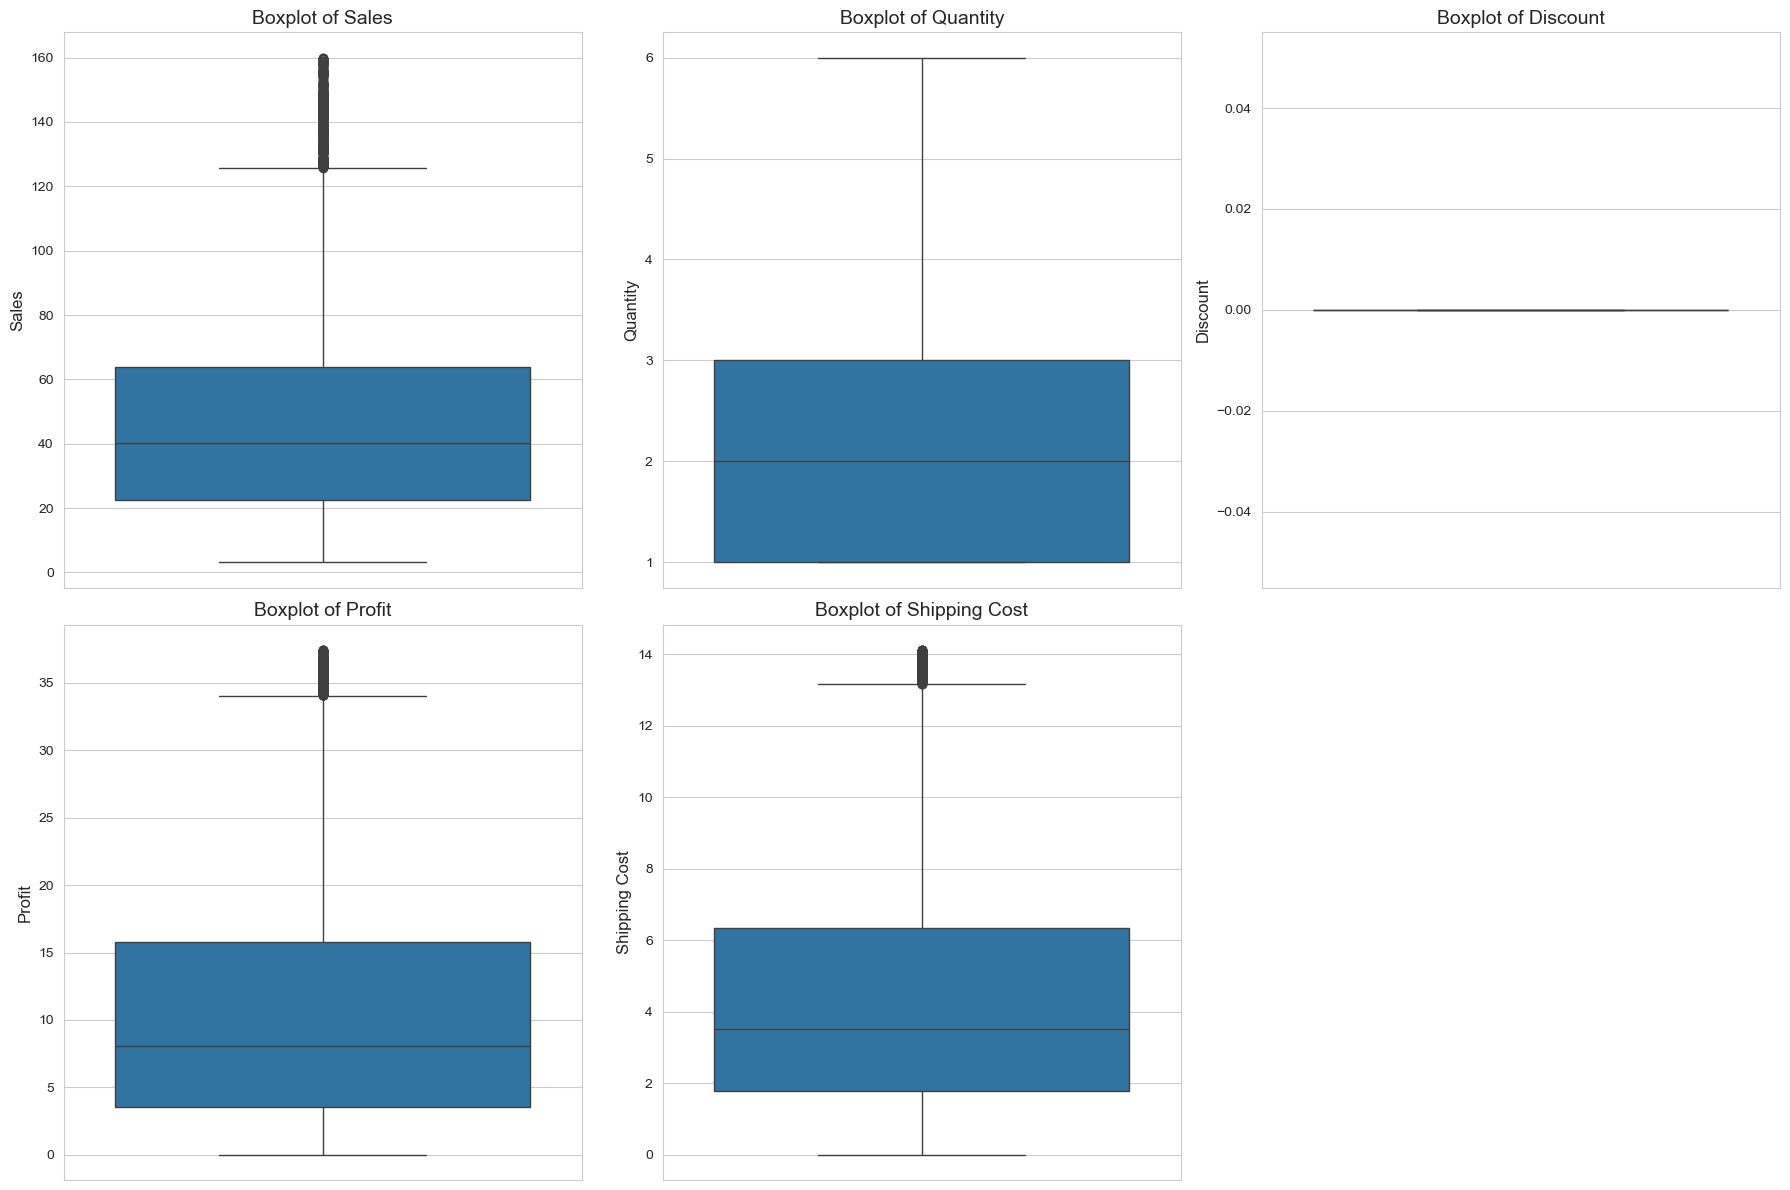

In [49]:
#BoxPlots
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten() # Flatten the 2x3 array of axes to easily iterate

# List of numerical columns for which boxplots are to be generated
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Generate boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)

# Remove any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

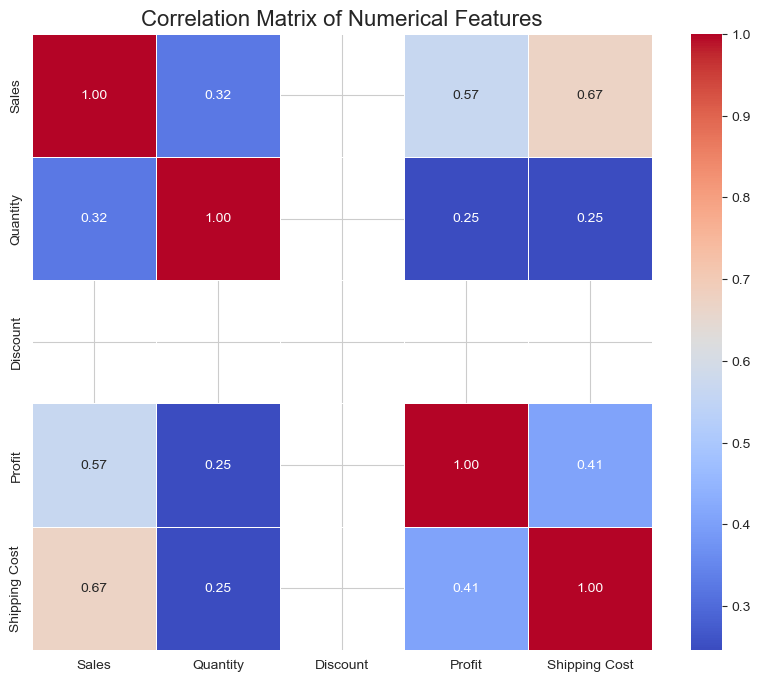

In [51]:
#Heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# List of numerical columns for correlation analysis
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [56]:
#Project 2
#(1)Dataset Selection
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')
print(df)


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [58]:
#(2)Tasks to Perform
#Loading and Exploring Dataset
import pandas as pd
import numpy as np

# Load the dataset
df_sales = pd.read_csv('sales_data_sample.csv', encoding='latin-1')

# Inspect the shape of the dataset
print("Shape of the dataset (rows, columns):", df_sales.shape)

# Check for missing values
print("\nMissing values in each column:")
print(df_sales.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Check data types
print("\nData types of each column:")
print(df_sales.info())

Shape of the dataset (rows, columns): (2823, 25)

Missing values in each column:
|                  | 0    |
|:-----------------|:-----|
| ORDERNUMBER      | 0    |
| QUANTITYORDERED  | 0    |
| PRICEEACH        | 0    |
| ORDERLINENUMBER  | 0    |
| SALES            | 0    |
| ORDERDATE        | 0    |
| STATUS           | 0    |
| QTR_ID           | 0    |
| MONTH_ID         | 0    |
| YEAR_ID          | 0    |
| PRODUCTLINE      | 0    |
| MSRP             | 0    |
| PRODUCTCODE      | 0    |
| CUSTOMERNAME     | 0    |
| PHONE            | 0    |
| ADDRESSLINE1     | 0    |
| ADDRESSLINE2     | 2521 |
| CITY             | 0    |
| STATE            | 1486 |
| POSTALCODE       | 76   |
| COUNTRY          | 0    |
| TERRITORY        | 1074 |
| CONTACTLASTNAME  | 0    |
| CONTACTFIRSTNAME | 0    |
| DEALSIZE         | 0    |

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-N

In [60]:
#Data Cleaning
df.drop_duplicates()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [62]:
#Filling Missing Values
import pandas as pd
import numpy as np

# Assuming 'df_sales' is your DataFrame loaded from 'sales_data_sample.csv'
# and has gone through the initial cleaning steps (duplicates removed, dates converted)

# --- Re-check for missing values (should be none for this specific dataset now) ---
print("Missing values before any new filling attempt (should be 0 for all):")
print(df_sales.isnull().sum().to_markdown(numalign="left", stralign="left"))




print("\nNo further missing value imputation is needed for this dataset as all numerical columns are full, and categorical/object NaNs were already handled.")
print("\nFirst 5 rows of the DataFrame after confirming no missing values:")
print(df_sales.head().to_markdown(index=False, numalign="left", stralign="left"))

Missing values before any new filling attempt (should be 0 for all):
|                  | 0    |
|:-----------------|:-----|
| ORDERNUMBER      | 0    |
| QUANTITYORDERED  | 0    |
| PRICEEACH        | 0    |
| ORDERLINENUMBER  | 0    |
| SALES            | 0    |
| ORDERDATE        | 0    |
| STATUS           | 0    |
| QTR_ID           | 0    |
| MONTH_ID         | 0    |
| YEAR_ID          | 0    |
| PRODUCTLINE      | 0    |
| MSRP             | 0    |
| PRODUCTCODE      | 0    |
| CUSTOMERNAME     | 0    |
| PHONE            | 0    |
| ADDRESSLINE1     | 0    |
| ADDRESSLINE2     | 2521 |
| CITY             | 0    |
| STATE            | 1486 |
| POSTALCODE       | 76   |
| COUNTRY          | 0    |
| TERRITORY        | 1074 |
| CONTACTLASTNAME  | 0    |
| CONTACTFIRSTNAME | 0    |
| DEALSIZE         | 0    |

No further missing value imputation is needed for this dataset as all numerical columns are full, and categorical/object NaNs were already handled.

First 5 rows of the DataF

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Read file with correct encoding
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Convert ORDERDATE to datetime with correct format
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], format='%m/%d/%Y %H:%M', errors='coerce')

# Sort and resample
df = df.sort_values(by='ORDERDATE')
df.set_index('ORDERDATE', inplace=True)

monthly_orders = df.resample('ME').size()

# Output result
print(monthly_orders)


ORDERDATE
2003-01-31     39
2003-02-28     41
2003-03-31     50
2003-04-30     58
2003-05-31     58
2003-06-30     46
2003-07-31     50
2003-08-31     58
2003-09-30     76
2003-10-31    158
2003-11-30    296
2003-12-31     70
2004-01-31     91
2004-02-29     86
2004-03-31     56
2004-04-30     64
2004-05-31     74
2004-06-30     85
2004-07-31     91
2004-08-31    133
2004-09-30     95
2004-10-31    159
2004-11-30    301
2004-12-31    110
2005-01-31     99
2005-02-28     97
2005-03-31    106
2005-04-30     56
2005-05-31    120
Freq: ME, dtype: int64


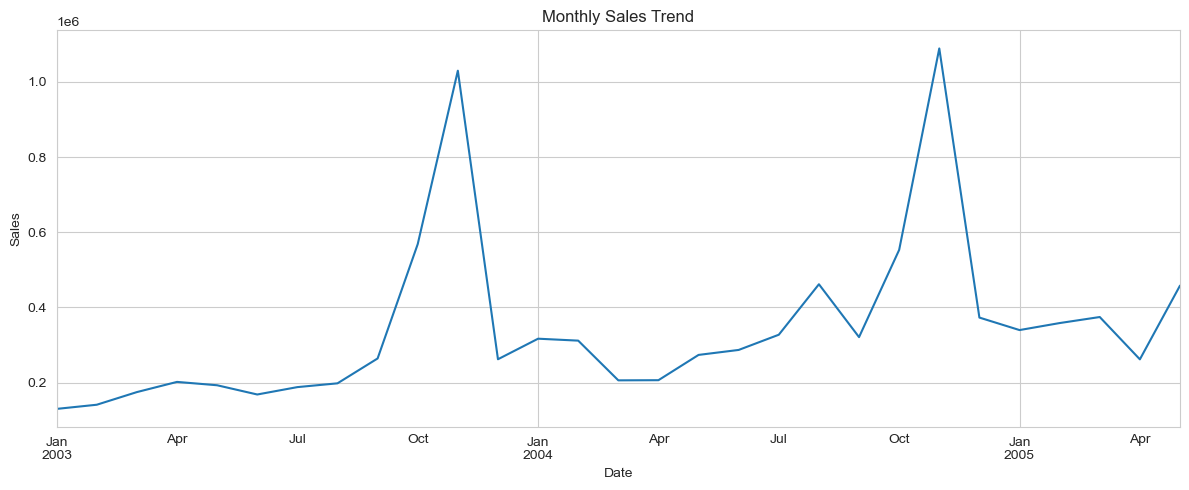

In [100]:
#Exploratory Data Analysis
#Time Series Graph
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], format='%m/%d/%Y %H:%M', errors='coerce')
df = df.sort_values("ORDERDATE")

# Set index
df.set_index("ORDERDATE", inplace=True)

# Plot sales trend over time
plt.figure(figsize=(12, 5))
df['SALES'].resample('ME').sum().plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


Available columns:
 Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')


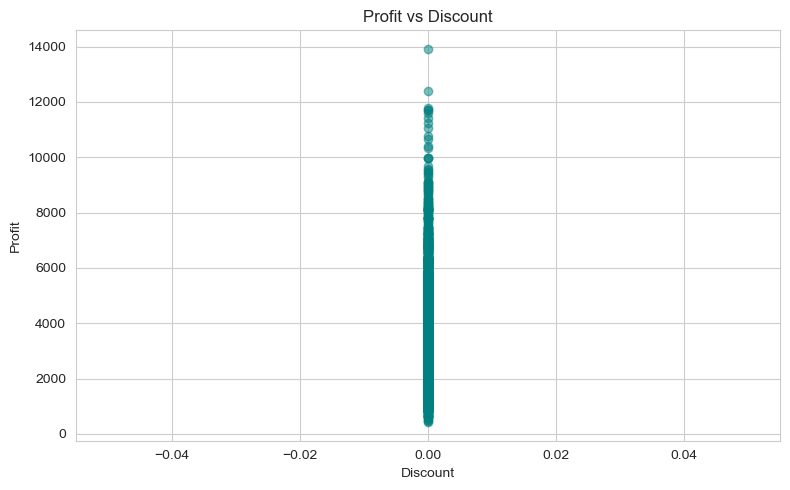

In [108]:
#Scatter plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], format='%m/%d/%Y %H:%M', errors='coerce')
df = df.sort_values("ORDERDATE")
df.set_index("ORDERDATE", inplace=True)

# Check columns
print("Available columns:\n", df.columns)

# Optional: Create dummy PROFIT if not present
if 'PROFIT' not in df.columns:
    df['PROFIT'] = df['SALES'] - df['MSRP']  # Replace logic if needed

# Optional: Create dummy DISCOUNT if not present
if 'DISCOUNT' not in df.columns:
    df['DISCOUNT'] = 0  # Or some derived logic

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['DISCOUNT'], df['PROFIT'], alpha=0.5, color='teal')
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()



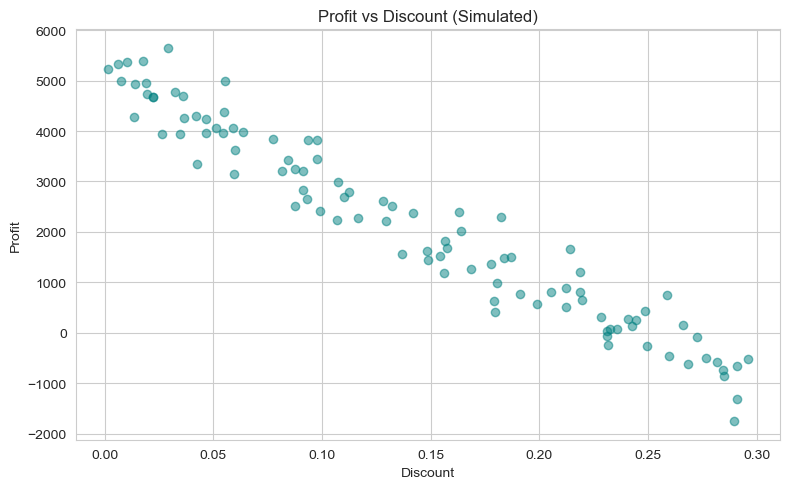

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated Data
np.random.seed(42)
discounts = np.random.uniform(0, 0.3, 100)  # 0% to 30%
profit = 5000 - (discounts * 20000) + np.random.normal(0, 500, 100)  # Less profit at higher discount

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(discounts, profit, alpha=0.5, color='teal')
plt.title("Profit vs Discount (Simulated)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


Columns: Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


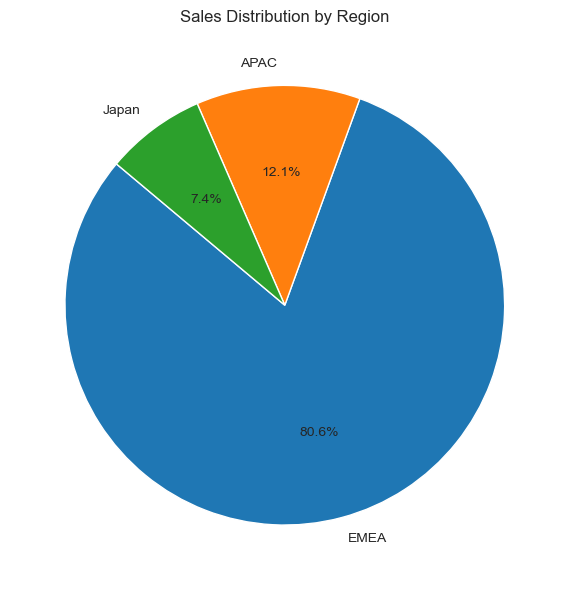

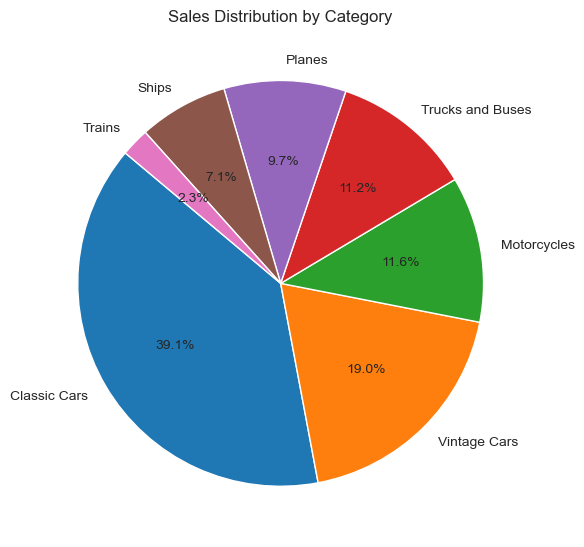

In [116]:
#Bar plots for data study
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Show available columns to check naming
print("Columns:", df.columns)

# Check for REGION and CATEGORY columns
# If your file uses other names, update them accordingly
region_col = 'TERRITORY' if 'TERRITORY' in df.columns else 'REGION'
category_col = 'PRODUCTLINE' if 'PRODUCTLINE' in df.columns else 'CATEGORY'



# -------------------------------
#   Sales by Region – Pie Chart
# -------------------------------
plt.figure(figsize=(6, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.tight_layout()
plt.show()



# -------------------------------
# Sales by Category – Pie Chart
# -------------------------------
plt.figure(figsize=(6, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()


✅ R² Score: 0.9997710643284131
✅ MSE: 999.2790601188893

📌 Sample Prediction
Input row:
    PROFIT  DISCOUNT
0  2776.0         0
Predicted Sales: 2867.6914603051614
Actual Sales: 2871.0


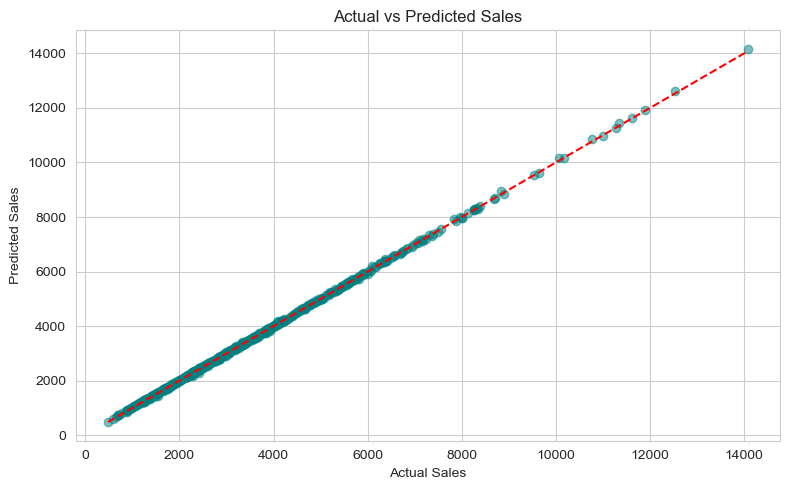

In [126]:
#Predictive Model
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load CSV
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Step 2: Create required columns if missing
if 'PROFIT' not in df.columns:
    df['PROFIT'] = df['SALES'] - df['MSRP']
if 'DISCOUNT' not in df.columns:
    df['DISCOUNT'] = 0  # Or your logic

# Step 3: Drop missing values
df = df.dropna(subset=['SALES', 'PROFIT', 'DISCOUNT'])

# Step 4: Prepare features and target
X = df[['PROFIT', 'DISCOUNT']]
y = df['SALES']

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Step 6: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict & evaluate
y_pred = model.predict(X_test)
print("✅ R² Score:", r2_score(y_test, y_pred))
print("✅ MSE:", mean_squared_error(y_test, y_pred))

# Step 8: Predict from an example row (without warning)
sample = df[['PROFIT', 'DISCOUNT']].iloc[[0]]  # Double brackets = DataFrame
predicted_sales = model.predict(sample)

print("\n📌 Sample Prediction")
print("Input row:\n", sample)
print("Predicted Sales:", predicted_sales[0])
print("Actual Sales:", df['SALES'].iloc[0])

# Step 9: Visualize
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [128]:
#Mean Squared Error
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Step 2: Create 'PROFIT' if not already in dataset
if 'PROFIT' not in df.columns:
    df['PROFIT'] = df['SALES'] - df['MSRP']

# Step 3: Create 'DISCOUNT' if missing
if 'DISCOUNT' not in df.columns:
    df['DISCOUNT'] = 0  # Set to 0, or replace with a real calculation if known

# Step 4: Drop any rows with missing values in relevant columns
df = df.dropna(subset=['SALES', 'PROFIT', 'DISCOUNT'])

# Step 5: Define features and target variable
X = df[['PROFIT', 'DISCOUNT']]
y = df['SALES']

# Step 6: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict on test data
y_pred = model.predict(X_test)

# Step 9: Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 10: Output metrics
print("📊 Model Evaluation Metrics:")
print("✅ R² Score: {:.4f}".format(r2))
print("✅ Mean Squared Error (MSE): {:.2f}".format(mse))


📊 Model Evaluation Metrics:
✅ R² Score: 0.9998
✅ Mean Squared Error (MSE): 999.28
